In [1]:
import numpy as np
import pandas as pd

from lets_plot import *


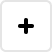
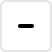
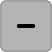
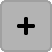
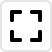
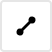
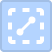
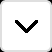
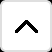
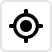
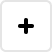
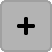
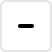
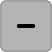
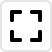
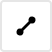
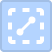
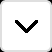
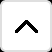
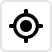

In [2]:
LetsPlot.setup_html()

# Function `parallel_coordinates_plot()`

In [3]:
def parallel_coordinates_plot(df: pd.DataFrame, class_column_name, order=None):
    plot_df = df.copy()
    plot_df.insert(0, 'par_plot_idx', list(range(df.shape[0])))

    var_names = df.columns.tolist()
    var_names.remove(class_column_name)

    plot_df = plot_df.melt(
        id_vars=[class_column_name, 'par_plot_idx'],
        value_vars= var_names
    )
    
    p = ggplot(plot_df, aes(x='variable', y='value', color=class_column_name, group='par_plot_idx')) \
        + geom_line(size=1)

    if order is not None:
        p += scale_x_discrete(breaks=order)
        
    return p

# Demo

In [4]:
iris = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/iris.csv')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

### Default plot

In [5]:
parallel_coordinates_plot(iris, 'species')

## Reordered columns with the `order` parameter

In [6]:
parallel_coordinates_plot(iris, 'species', order=['petal_width', 'sepal_width', 'petal_length', 'sepal_length'])

See also:  
https://r-graph-gallery.com/parallel-plot.html